In [8]:
from google.colab import files
uploaded = files.upload()


Saving weight-height.csv to weight-height.csv


In [9]:
import pandas as pd
df = pd.read_csv("weight-height.csv").sample(100) # read csv files with sample 100 data
df.head() # show first 5 data

,Height,Weight
6818,67.390020,169.626608
4014,70.048667,204.779499
8184,64.762147,142.264983
18,69.640060,185.983958
8214,67.129603,134.273575


In [10]:
df.tail(3) # show last 3 data

,Height,Weight
7564,61.736061,145.559462
6319,64.493943,127.704661
5874,65.678306,146.513377


In [12]:
df.shape # how many row and column

(100, 2)

In [13]:
df.columns # show the column name

Index(['Height', 'Weight'], dtype='object')

In [15]:
df.isna().sum() # calculate total num of null value in the data set

,0
Height,0
Weight,0


In [17]:
df.info() # display data frame information

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 6818 to 5874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  100 non-null    float64
 1   Weight  100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


In [18]:
df.describe() # display statistical description

,Height,Weight
count,100.000000,100.000000
mean,66.300772,162.973165
std,3.433861,27.748960
min,57.558710,99.331383
25%,63.856811,139.231563
50%,66.211071,168.222497
75%,68.553597,187.004060
max,76.027082,232.313471


In [19]:
#eda
#!pip install matplotlib

Text(0.5, 1.0, 'conbination of hegit and weight')

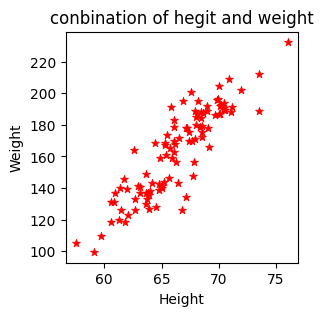

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(df["Height"], df["Weight"], color ="r",marker= "*", linewidths= .55) # scatter plot of height and wight as x and y
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("conbination of hegit and weight")

In [21]:
df.head()

,Height,Weight
6818,67.390020,169.626608
4014,70.048667,204.779499
8184,64.762147,142.264983
18,69.640060,185.983958
8214,67.129603,134.273575


In [23]:
x = df[["Height"]] # define x = height
y = df[["Weight"]] # define y = weight

In [24]:
#x = df.drop("Weight")
#y = df["Weight"]

In [25]:
x.head()

,Height
6818,67.390020
4014,70.048667
8184,64.762147
18,69.640060
8214,67.129603


In [26]:
y.head()

,Weight
6818,169.626608
4014,204.779499
8184,142.264983
18,185.983958
8214,134.273575


In [27]:
#pip install scikit-learn # scikit-learn need to be install first

In [28]:
from sklearn.model_selection import train_test_split # import train_test_split

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=.8,random_state=1) # split test and train size to 20% and 80%

In [30]:
xtrain.head()

,Height
8184,64.762147
1294,67.129287
7564,61.736061
3462,68.429372
4177,66.054377


In [31]:
ytrain.head()

,Weight
8184,142.264983
1294,177.719799
7564,145.559462
3462,184.252544
4177,162.517073


In [32]:
xtest.head()

,Height
1716,66.082908
3713,64.430696
5982,63.690300
3068,70.102246
6091,65.204481


In [33]:
ytest.head()

,Weight
1716,169.617202
3713,168.795615
5982,132.971110
3068,191.995693
6091,143.563339


In [34]:
xtrain.shape

(80, 1)

In [35]:
ytrain.shape

(80, 1)

In [36]:
xtest.shape

(20, 1)

In [37]:
#linear regression
from sklearn.linear_model import LinearRegression #import linear regression model
lr = LinearRegression() # create linear regression object

In [38]:
lr

LinearRegression()

In [39]:
lr.fit(xtrain,ytrain) # train data

LinearRegression()

In [40]:
lr.score(xtrain,ytrain) #calculate accuracy of train data. 1 is perfect

0.7866079756054047

In [41]:
lr.score(xtest, ytest) #calculate accuracy of test data. 1 is perfect

0.7537338758020967

In [42]:
lr.predict([[60.815059]]) #predict one fixed value

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[122.85190251]])

In [43]:
df["predit1"] = lr.predict(df[["Height"]]) # predit height with LR model

In [44]:
df.head() # show with predict value

,Height,Weight,predit1
6818,67.390020,169.626608,169.943021
4014,70.048667,204.779499,188.984758
8184,64.762147,142.264983,151.121699
18,69.640060,185.983958,186.058234
8214,67.129603,134.273575,168.077862


In [45]:
df.head()

,Height,Weight,predit1
6818,67.390020,169.626608,169.943021
4014,70.048667,204.779499,188.984758
8184,64.762147,142.264983,151.121699
18,69.640060,185.983958,186.058234
8214,67.129603,134.273575,168.077862


In [46]:
df["error"]= df["Weight"] - df["predit1"] # calculate error for each
df.head()

,Height,Weight,predit1,error
6818,67.390020,169.626608,169.943021,-0.316414
4014,70.048667,204.779499,188.984758,15.794741
8184,64.762147,142.264983,151.121699,-8.856715
18,69.640060,185.983958,186.058234,-0.074277
8214,67.129603,134.273575,168.077862,-33.804288


In [47]:
pre = lr.predict(xtest) # predict test data

In [48]:
pre

array([[160.58124017],
       [148.74778026],
       [143.44492162],
       [189.36850025],
       [154.28977624],
       [155.2869289 ],
       [154.91971777],
       [123.79578767],
       [192.67109227],
       [139.59978227],
       [160.76741421],
       [145.36070355],
       [178.69590604],
       [142.85562546],
       [173.85965627],
       [159.19208303],
       [139.58053252],
       [171.96729012],
       [174.60924296],
       [191.63061366]])

Text(0.5, 1.0, 'conbination of hegit and weight')

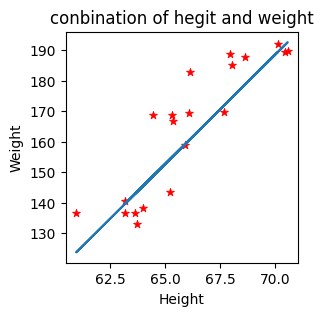

In [49]:
plt.figure(figsize=(3,3))
plt.scatter(xtest,ytest, color ="r",marker= "*", linewidths= .55)
plt.plot(xtest, lr.predict(xtest)) # scatter plot with best fit line with xtest data
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("conbination of hegit and weight")

Text(0.5, 1.0, 'conbination of hegit and weight')

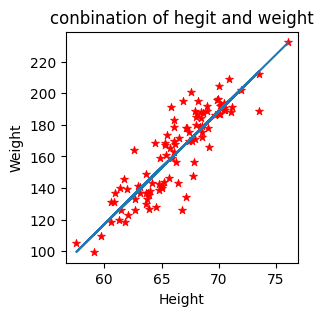

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(df["Height"], df["Weight"], color ="r",marker= "*", linewidths= .55)
plt.plot(xtrain, lr.predict(xtrain)) # plot scatter plot with best fit line for xtrain data
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("conbination of hegit and weight")

Text(0.5, 1.0, 'conbination of hegit and weight')

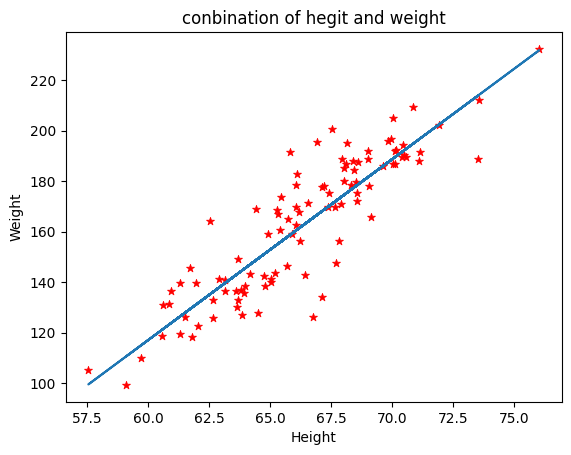

In [51]:
plt.scatter(x,y, color ="r",marker= "*", linewidths= .55)
plt.plot(x, lr.predict(x)) # for x data
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("conbination of hegit and weight")

In [52]:
from sklearn.metrics import mean_squared_error as mse # import MSE
from sklearn.metrics import mean_absolute_error as mae # import MAE

In [53]:
MSE = mse(xtest,ytest) # calculate mse

In [54]:
MSE

10005.839923667296

In [55]:
MAE = mae(xtest,ytest) # calculate mae

In [56]:
MAE

98.20866760650001

In [57]:
#y = mx + c

m = lr.coef_ # slop
c = lr.intercept_ #intercept

In [58]:
m

array([[7.16218983]])

In [59]:
c

array([-312.7170943])

In [60]:
y = m * 68.476617 + c # check for the fixed x value
y

array([[177.72543527]])